In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [94]:
#importing and previewing data
df=pd.read_csv("train.csv") 
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


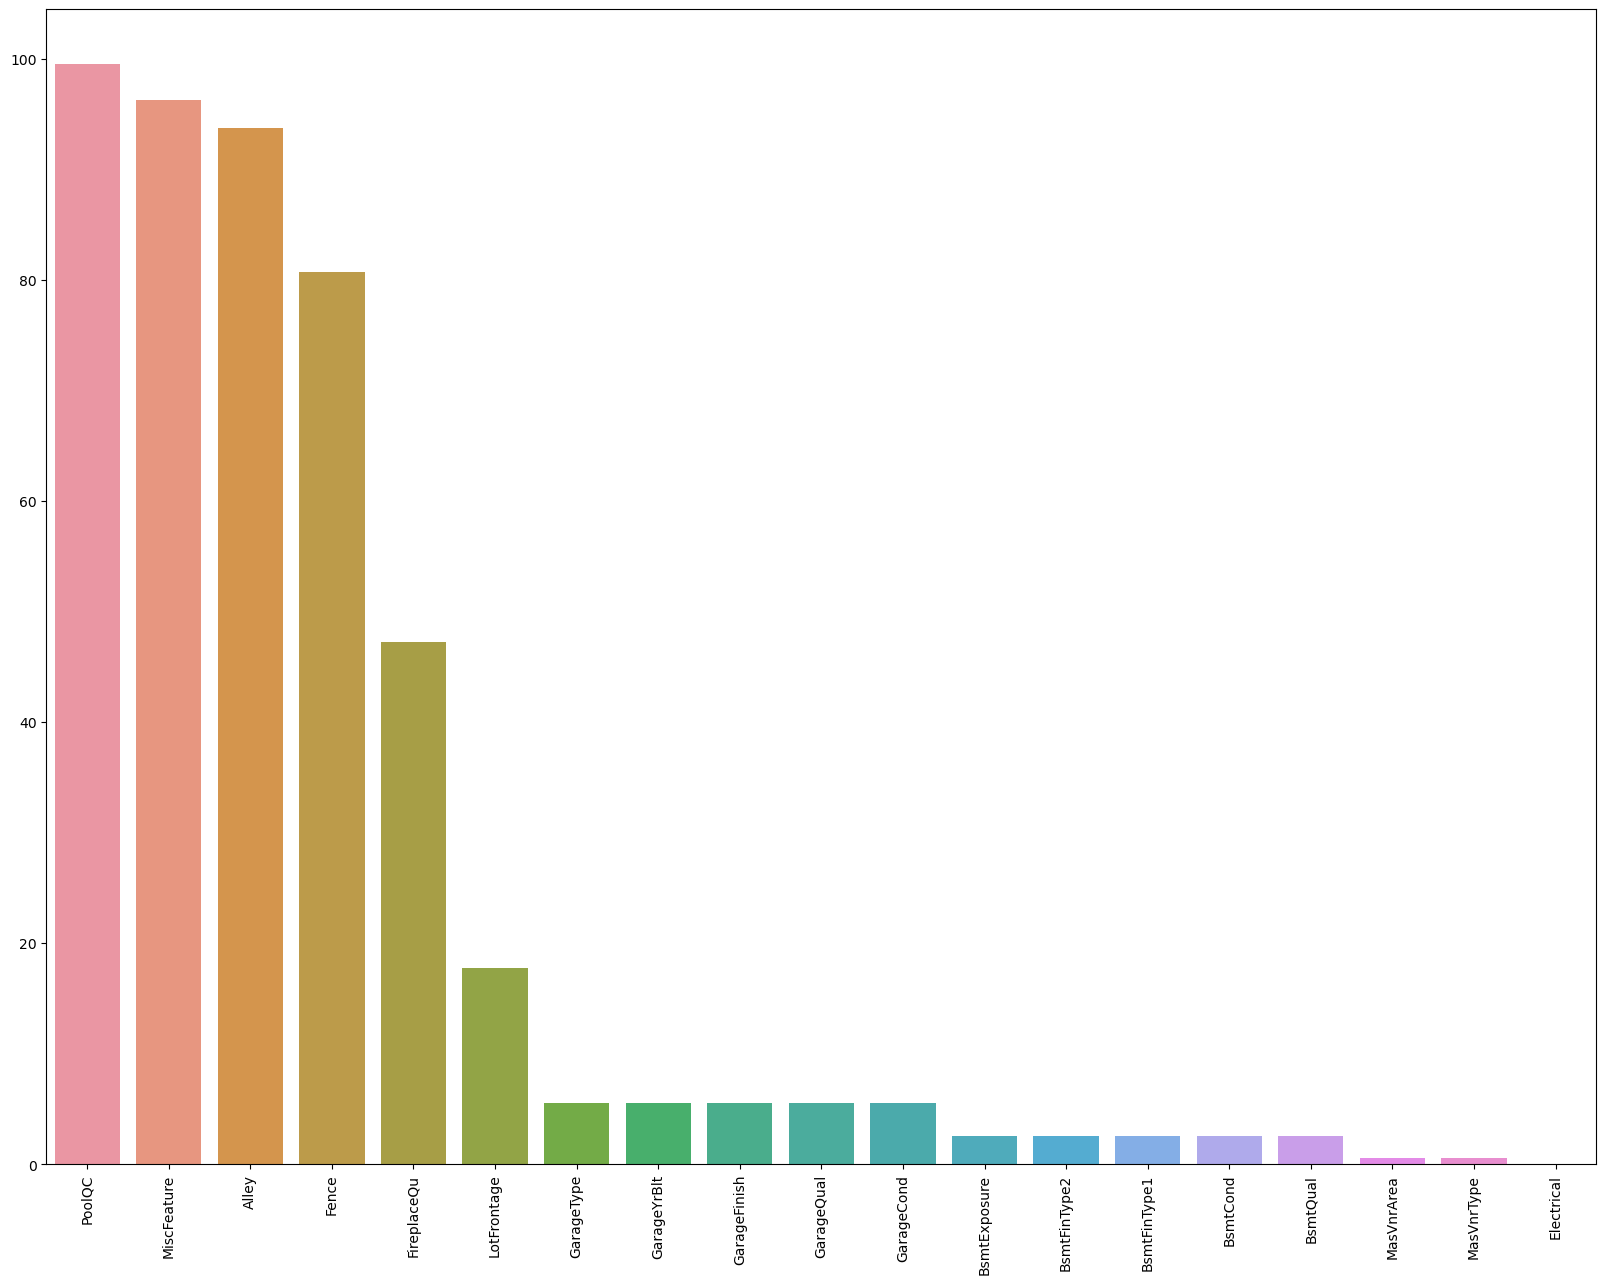

In [95]:
#dermination of missing value pourcentage for each feature 

#df.loc[df.loc[pd.isnull(df.Alley)==True].index,'Alley']
A=100*df.isnull().sum()/len(df)
A=A.drop(A[A==0].index).sort_values(ascending=False)
print(A)

plt.figure(figsize=(20, 15))
plt.xticks(rotation='90')
sn.barplot(x=A.index,y=A)
plt.show()


In [96]:
#fill lot frontage with mean of each neighborhood

df[pd.isnull(df.LotFrontage)==True].index

df['LotFrontage']=df.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.mean()))


In [97]:
df.groupby('Neighborhood')['LotFrontage']

In [98]:
#df.drop(['Alley'],axis=1,inplace=True)
df.drop(['PoolQC','Alley','MiscFeature','Fence','GarageYrBlt','Id'],axis=1,inplace=True)
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])

df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df.dropna(inplace=True)


In [99]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

(1459, 75)

In [100]:
#number of numerical features
numerical_features=[feature for feature in df.columns if df[feature].dtypes !='object']
print(len(numerical_features))
df[numerical_features].head()


36


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [101]:
Year_features=[feature for feature in numerical_features if 'Year' in feature or 'Yr' in feature]
print(Year_features)

['YearBuilt', 'YearRemodAdd', 'YrSold']


In [102]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [103]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [104]:
len(columns)

39

In [105]:
def one_hot(B,multcolumns):
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(B[fields],drop_first=True)
        B.drop([fields],axis=1,inplace=True)
        B=pd.concat([B,df1],axis=1)
    return B

In [108]:
test_df=pd.read_csv("test.csv") 
test_df.shape

(1459, 80)

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Functional       0.137080
Utilities        0.137080
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
dtype: float64


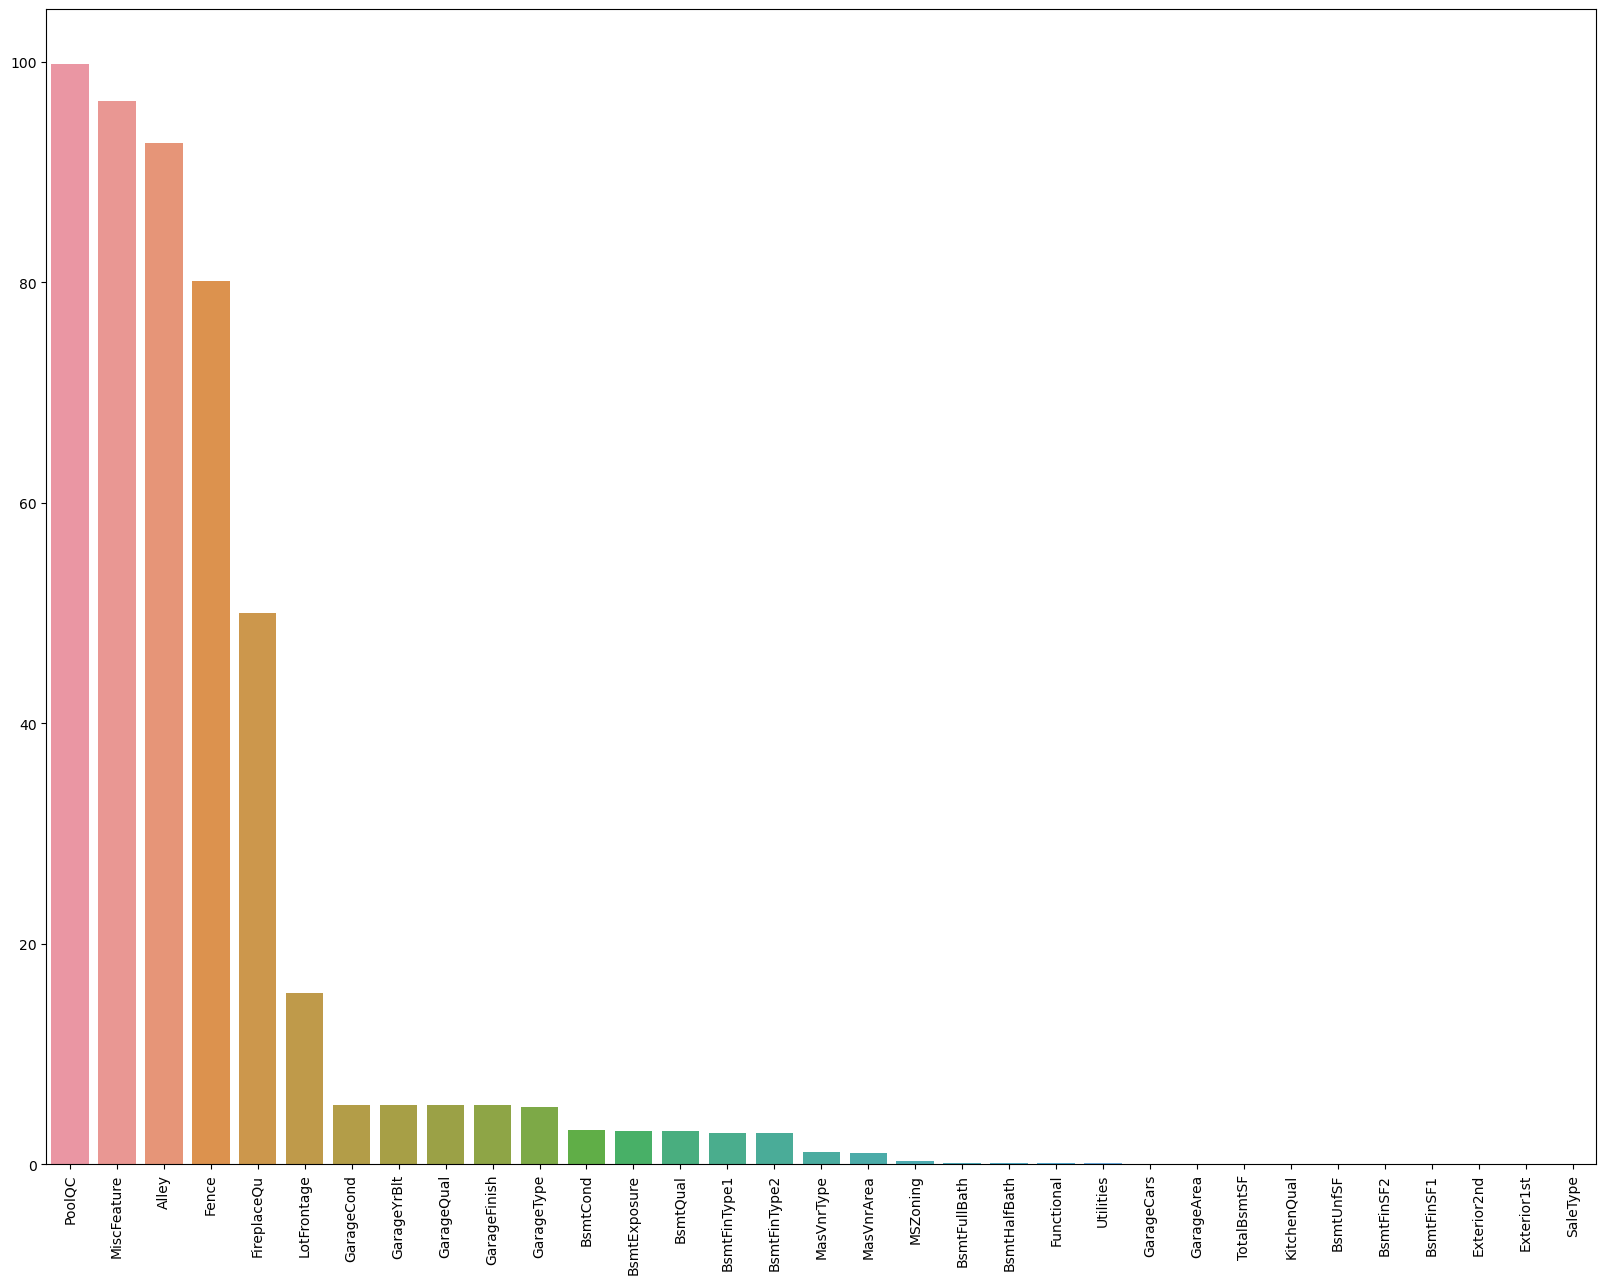

In [109]:
A=100*test_df.isnull().sum()/len(test_df)
A=A.drop(A[A==0].index).sort_values(ascending=False)
print(A)

plt.figure(figsize=(20, 15))
plt.xticks(rotation='90')
sn.barplot(x=A.index,y=A)
plt.show()


In [110]:
#fill lot frontage with mean of each neighborhood

test_df[pd.isnull(test_df.LotFrontage)==True].index

test_df['LotFrontage']=test_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.mean()))

In [111]:
test_df.drop(['PoolQC','Alley','MiscFeature','Fence','GarageYrBlt','Id'],axis=1,inplace=True)
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])

test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df.dropna(inplace=True)

In [112]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1432 non-null   int64  
 1   MSZoning       1432 non-null   object 
 2   LotFrontage    1432 non-null   float64
 3   LotArea        1432 non-null   int64  
 4   Street         1432 non-null   object 
 5   LotShape       1432 non-null   object 
 6   LandContour    1432 non-null   object 
 7   Utilities      1432 non-null   object 
 8   LotConfig      1432 non-null   object 
 9   LandSlope      1432 non-null   object 
 10  Neighborhood   1432 non-null   object 
 11  Condition1     1432 non-null   object 
 12  Condition2     1432 non-null   object 
 13  BldgType       1432 non-null   object 
 14  HouseStyle     1432 non-null   object 
 15  OverallQual    1432 non-null   int64  
 16  OverallCond    1432 non-null   int64  
 17  YearBuilt      1432 non-null   int64  
 18  YearRemo

In [113]:
test_df.to_csv('formulatedtest.csv',index=False)

In [114]:
test_df.shape

(1432, 74)

In [115]:
df.shape

(1459, 75)

In [116]:
final_df=pd.concat([df,test_df],axis=0)

In [117]:
final_df.shape

(2891, 75)

In [118]:
final_df=one_hot(final_df,columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [119]:
final_df.shape

(2891, 236)

In [123]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [124]:
final_df.shape

(2891, 176)